# Retail: Assess Sales Outlets' Performance

Assess the performance of the chain's sales outlets.

- [x] Carry out exploratory data analysis
- [x] Assess the performance of the sales outlets
- [x] Test statistical hypotheses

**Presentation link** https://drive.google.com/file/d/1Ad4tkhnjDzM0yts9EpvR1xZQOlf8XRNH/view?usp=sharing

## Task Decomposition

### The problem

We have data on purchases made at the building-material retailer Home World. All of its customers have membership cards. Moreover, they can become members of the store's loyalty program for $20 per month. The program includes discounts, information on special offers, and gifts.

**The goal of the analysis** will be to assess how different sales outlets perform. This will allow us to understand more about customers behavior and if it is dependent on factors such as: loyalty program membership, buying frequency, sales outlet location, seasonality.

### On EDA

Before conducting the analysis, it is necessary to preprocess the data. The goal of it is to make sure our dataset is as accurate as possible. 

Here is what would be done:

1. Checking data for duplicates and dropping them.
2. Checking data for missing values. Depending on the amount of missing values, they will either be dropped or replaced.
3. Making sure that all the data is converted to appropriate formats.

### Metrics, Relationships, Outlet Characteristics

We will calculate the **amount of customers who have opted in the loyalty program**. 

It would also be interesting to see **the amount of purchases per month** and **the average amount of items purchased per customer (loyal and non-loyal)**, as well as **calculating the average amount of items purchased per store**.

### Hypotheses

There are several hypothesis we can test. We will focus on the following:

1. Loyalty program members tend to buy more often.
2. Shop with bigger amount of loyal customers has more purchases per month.

## Importing Relevant Libraries and Datasets

In [1]:
#importing the libraries

import pandas as pd
pd.set_option('max_colwidth', 400)
from scipy import stats as st
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from plotly import graph_objects as go
from statistics import mean
from statsmodels.stats.weightstats import ztest
from statsmodels.stats import weightstats as stests
import time
import math as mth
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
retail_us = pd.read_csv('/datasets/retail_dataset_us.csv')
product_codes = pd.read_csv('/datasets/product_codes_us.csv', sep=";")

## EDA

Here, we will answer the following questions:

- Are there data types that need to be converted?
- Are there missing values and how to approach them?
- Are there any duplicates?
- Is there a need to rename some of the columns?

### retail_us dataframe

In [3]:
#exploring the retail_us dataframe

print(retail_us.info())
print()
print("retail_us, head:")
display(retail_us.head())
print()
print("retail_us, tail:")
display(retail_us.tail())
print()
print("retail_us, sample:")
retail_us.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
purchaseid         105335 non-null object
item_ID            105335 non-null object
Quantity           105335 non-null int64
purchasedate       105335 non-null object
CustomerID         69125 non-null float64
loyalty_program    105335 non-null int64
ShopID             105335 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB
None

retail_us, head:


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28



retail_us, tail:


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
105330,538566,21826,1,2016-12-13 11:21:00,NaN,0,Shop 0
105331,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24
105332,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16
105333,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29
105334,543977,22384,9,2017-02-14 15:35:00,21294.0,0,Shop 19



retail_us, sample:


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
70041,544450,22525,19,2017-02-20 12:23:00,23490.0,1,Shop 25
45384,545053,85016,1,2017-02-27 12:41:00,23195.0,1,Shop 16
60331,537855,22224,1,2016-12-08 15:59:00,21675.0,0,Shop 15
102514,536832,21925,11,2016-12-02 17:41:00,22313.0,1,Shop 29
28454,544833,21735,1,2017-02-24 10:10:00,21653.0,0,Shop 12


##### Conclusion

After looking at the dataframe, we can see that the following can be done:

- [x] renaming the columns
- [x] converting the data types: both for memory optimization and the convenience of further analysis

Moreover, we see some missing values in the dataset. This will be explored later on.

In [4]:
#renaming the columns

retail_us.columns = ['purchase_id', 'item_id', "quantity", "purchase_date", "customer_id", "loyalty_program", "shop_id"]

In [5]:
#converting the data types

retail_us["customer_id"] = retail_us["customer_id"].apply(pd.to_numeric)
retail_us[['purchase_id', 'item_id', 'shop_id']] = retail_us[['purchase_id', 'item_id', 'shop_id']].apply(lambda x: x. astype('category'))
retail_us['purchase_date'] = pd.to_datetime(retail_us['purchase_date'])

#we will also add a column with month of a purchase for further analysis

retail_us['purchase_month'] = retail_us['purchase_date'].astype('datetime64[M]')

#### Exploring the missing values

In [6]:
#looking for the missing values

retail_us.isnull().sum()*100/len(retail_us)

purchase_id         0.000000
item_id             0.000000
quantity            0.000000
purchase_date       0.000000
customer_id        34.376038
loyalty_program     0.000000
shop_id             0.000000
purchase_month      0.000000
dtype: float64

##### Conclusion

We see that the **customer_id** column contains a lot of missing values: almost 35%. When thinking about the **reasons**, the most likely is human or technical mistake. 

customer_id information is important for this dataset and this amount of missing values might affect our analysis drastically. 

However, since we do not have a chance to replenish this data, it is better to replace the missing values with indicators that data is missing.

In [7]:
#filling in the missing values at the customer_id column

retail_us["customer_id"] = retail_us["customer_id"].fillna(value="unknown")

#### Looking for duplicates

In [8]:
#displaying the amount of duplicated data

duplicated = retail_us.duplicated().sum()

display(duplicated)

1033

In [9]:
#displaying the amount of duplicated data

(~retail_us.duplicated()).sum()

104302

In [10]:
#calculating the percentage of duplicates in the dataset

retail_us.duplicated().sum()*100/len(retail_us)

0.9806806854321926

##### Conclusion

We see that the amount of duplicates constitutes only 0.9% out of the entire dataset. It is safe to drop them.

In [11]:
#droping the duplicates

retail_us.drop_duplicates()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,purchase_month
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-01
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2,2016-12-01
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,2016-12-01
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28,2017-02-01
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28,2017-02-01
...,...,...,...,...,...,...,...,...
105330,538566,21826,1,2016-12-13 11:21:00,unknown,0,Shop 0,2016-12-01
105331,540247,21742,0,2017-01-05 15:56:00,21143,0,Shop 24,2017-01-01
105332,538068,85048,1,2016-12-09 14:05:00,23657,1,Shop 16,2016-12-01
105333,538207,22818,11,2016-12-10 11:33:00,18427,0,Shop 29,2016-12-01


<div class="alert alert-success">
    +
</div>

#### retail_us dataframe: EDA Conclusion

We have conducted EDA for retail_us dataframe. Here are our **conclusions**:

- the columns have been renamed and the data types have been changed
- we have discovered a considerable amount of **missing values** (almost 37%) in the customer_id column. It has been decided not to replace them but indicate that the value is missing.
- there have also been discovered some **duplicates** in the dataset. However, their amount is only 0.9%, so it was decided to drop the duplicates.

The data is now ready for further analysis.

### product_codes dataframe

In [12]:
#exploring the product_codes dataframe

print(product_codes.info())
print()
print("product_codes, head:")
display(product_codes.head())
print()
print("product_codes, tail:")
display(product_codes.tail())
print()
print("product_codes, sample:")
product_codes.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
productID        3159 non-null object
price_per_one    3159 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB
None

product_codes, head:


,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42



product_codes, tail:


,productID,price_per_one
3154,gift_0001_20,16.67
3155,gift_0001_30,25.00
3156,gift_0001_40,34.04
3157,gift_0001_50,42.55
3158,m,2.55



product_codes, sample:


,productID,price_per_one
2745,85169C,0.42
3021,90164B,7.48
1769,22928,5.95
1484,22631,1.65
2955,90123C,5.94


##### Conclusion

After looking at the dataframe, we can see that the following can be done:

- [x] renaming the columns
- [x] converting the data types: both for memory optimization and the convenience of further analysis

We can also see that the product IDs are rather inconsistent. We see names such as m, 85160A, gift_0001_50 which can impact the quality of further analysis. 

However, this is a problem of dataset or/and the chain that has different naming conventions for each store. And we, as data analysts, can do little about it.

In [13]:
#renaming the columns

product_codes.columns = ['product_id', 'price_per_one']

In [14]:
#converting the data types

product_codes['product_id'] = product_codes['product_id'].astype('category')

#### Exploring the missing values

In [15]:
#looking for the missing values

product_codes.isnull().sum()*100/len(product_codes)

product_id       0.0
price_per_one    0.0
dtype: float64

##### Conclusion

No missing values were identified.

#### Looking for duplicates

In [16]:
#calculating the percentage of duplicates in the dataset

product_codes.duplicated().sum()*100/len(product_codes)

0.0

##### Conclusion

No duplicates were identified.

#### product_codes dataframe: EDA Conclusion

We have conducted EDA for product_codes dataframe. Here are our **conclusions**:

- the columns have been renamed and the data types have been changed
- we have not discovered any duplicates or/and missing values

The data is now ready for further analysis.

## Assessing the performance of the sales outlets

To recap, here is what will be done:

- [x] calculating the amount of customers who have opted in the loyalty program per store
- [x] calculating the amount of purchases per month per store
- [x] calculating the average amount of items purchased per customer (loyal and non-loyal)
- [x] calculating the average amount of items purchased per store

### Calculating the amount of customers who have opted in the loyalty program per store

In [17]:
#first, we will calculate the overall amount of customers who participate and do not participate in the loyalty program

retail_us.groupby("loyalty_program").agg({'customer_id': 'nunique'})

,customer_id
loyalty_program,
0,1163
1,587


##### Conclusions

Here, it is important to mention that **loyalty_program 0** means **no** and **loyalty_program 1** means **yes**.

Now, we can see that there are **587 unique customers** who have opted into the loyalty program, while there are **1163** who have not. It is also important to mention that customer_id column has a lot of missing values which most likely has skewed the data.

Now, we will make the same calculation per each store.

In [18]:
#calculating the amount of loyalty program participants and customers who do not participate per store 

loyalty_program_status = retail_us.pivot_table(
    index='shop_id',
    columns='loyalty_program',
    aggfunc=({'customer_id': 'nunique'})
) 

loyalty_program_status.style.highlight_max(color='#90EE90')\
                .highlight_min(color='#cd4f39')

##### Conclusion

We have obtained a table that shows the amount of people who opted for a loyalty program, as well the ones who do not, per store.

We have also highlighted the lowest numbers (in red) and the highest (in green). Based on it, we see the following:

1. **Shop 19** has the biggest amount of non-loyalty program customers: 102.
2. **Shop 13** has the biggest amount of loyalty program customers: 50.
3. **Shop 28** has the smallest amount of loyalty program customers: 33.

Lets also see how many customers each shop has, overall.

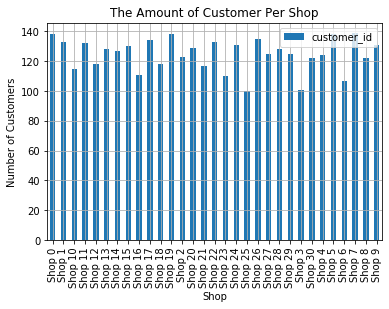

In [19]:
#calculating the overall amount of customers per shop and plotting it on a graph

customers_overall = retail_us.groupby("shop_id").agg({'customer_id': 'nunique'})

customers_overall.plot(kind="bar", grid=True)
plt.title("The Amount of Customer Per Shop")
plt.xlabel("Shop")
plt.ylabel("Number of Customers")
plt.show()

##### Conclusion

We see that the amount of customers per shop are distributed quite evenly. 

We can speculate it means the following: all shops in the chain perform quite well in terms of the amount of customers and we do not see any downdogs here.

We will also plot the similar graphs for loyalty program participants and people who are not into one.

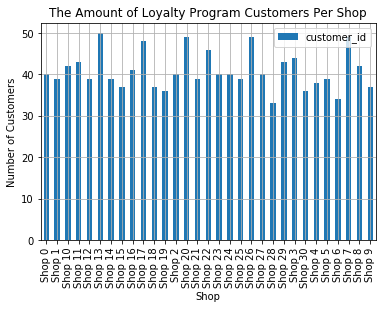

In [20]:
#extracting the loyalty program participants

loyalty_program_yes = retail_us[retail_us['loyalty_program']==1]

#grouping by store

loyalty_by_store = loyalty_program_yes.groupby("shop_id").agg({'customer_id': 'nunique'})

#plotting the graph

loyalty_by_store.plot(kind="bar", grid=True)
plt.title("The Amount of Loyalty Program Customers Per Shop")
plt.xlabel("Shop")
plt.ylabel("Number of Customers")
plt.show()

##### Conclusion

Looking at the graph, we see that the following shops are leaders in terms of the amount of loyalty program customers:

- Shop 13
- Shop 17
- Shop 20
- Shop 27
- Shop 7

The amount of loyalty program customers per shop is quite even here. **What unifies all these stores?** There can be many reasons: for example, geographical proximity.

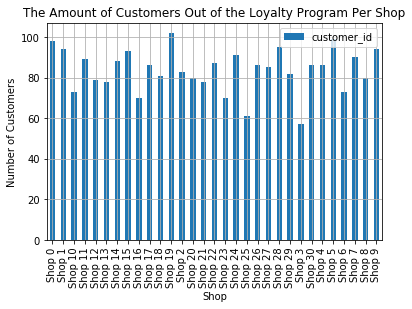

In [21]:
#extracting the non-loyalty program participants

loyalty_program_no = retail_us[retail_us['loyalty_program']==0]

#grouping by store

non_loyalty_by_store = loyalty_program_no.groupby("shop_id").agg({'customer_id': 'nunique'})

#plotting the graph

non_loyalty_by_store.plot(kind="bar", grid=True)
plt.title("The Amount of Customers Out of the Loyalty Program Per Shop")
plt.xlabel("Shop")
plt.ylabel("Number of Customers")
plt.show()

##### Conclusion

Here, we can see the shops with the biggest amount of non-loyalty program customers. These are:

- Shop 0
- Shop 1
- Shop 19
- Shop 4

### Calculating the number of purchases per month per store

It is also important to note that one customer can make more than one purchase per month. Therefore, we will be looking at the general count, not on the amount of unique purchases.

In [22]:
#calculating the amount of purchases per month per store

purchases_per_month = retail_us.pivot_table(
    index='shop_id',
    columns='purchase_month',
    aggfunc=({'purchase_id': 'count'})
) 

purchases_per_month.style.highlight_max(color='#90EE90')\
                .highlight_min(color='#cd4f39')

##### Conclusions

It is interesting to see that **Shop 0** is a leader in terms of purchases per month for every month that is present in the dataset.

It is also worth mentioning that shop 0 has one of the lowest amount of loyal customers. We can speculate than that **participation in the loyalty program does not necessary equal the biggest amount of purchases**.

We also see **the shops with the lowest amount of purchases per month**. These are:

- Shop 23 (2016-12-01)
- Shop 6 (2017-01-01)
- Shop 12 (2017-02-01)

Interesting to see there is no shop that performs consistently low month after month. This is a good sign, as it shows that there is no shop with big problems, purchases wise. The reason for these shops to perform low in given months might be **seasonality**.

Regarding Shop 0, that is an absolute leader in terms of purchases, we can speculate it might have been caused by **location**. Perhaps, this shop is located in a big city.

### Calculating the average amount of items purchased per customer (loyal and non-loyal)

In [23]:
#looking at the average amount of items purchased per loyal customers

average_items_loyal = loyalty_program_yes.groupby(['customer_id']).agg({'quantity': 'count'}).mean()

print("The average amount of items purchased by loyal customers is")
print(average_items_loyal)

The average amount of items purchased by loyal customers is
quantity    40.616695
dtype: float64


In [24]:
#looking at the average amount of items purchased per non-loyal customers

average_items_non_loyal = loyalty_program_no.groupby(['customer_id']).agg({'quantity': 'count'}).mean()

print("The average amount of items purchased by non-loyal customers is")
print(average_items_non_loyal)

The average amount of items purchased by non-loyal customers is
quantity    70.071367
dtype: float64


##### Conclusions

It is interesting to see that non-loyal customers tend to buy more than loyal ones. Perhaps, the loyalty program participants tend to buy less but their average purchase size is bigger. 

We will also calculate the average amount of items purchased per store.

### Calculating the average amount of items purchased per store

In [25]:
items_per_store = retail_us.pivot_table(
    index='shop_id',
    aggfunc=({'quantity': 'count'})
) 

items_per_store.style.highlight_max(color='#90EE90')\
                .highlight_min(color='#cd4f39')

,quantity
shop_id,
Shop 0,38389
Shop 1,2744
Shop 10,2204
Shop 11,2301
Shop 12,1786
Shop 13,2448
Shop 14,2400
Shop 15,2710
Shop 16,1939


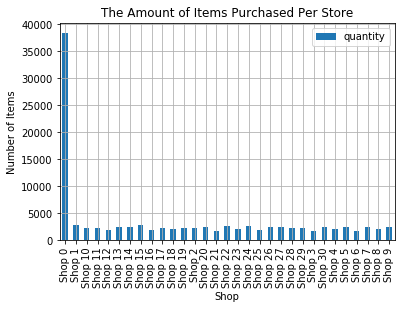

In [26]:
#plotting the graph

items_per_store.plot(kind="bar", grid=True)
plt.title("The Amount of Items Purchased Per Store")
plt.xlabel("Shop")
plt.ylabel("Number of Items")
plt.show()

##### Conclusions

Once again, Shop 0 shows an unusual amount of items purchased, compared to other shops. Is this an unusually successful shop, or is it an outlier?

### Assessing the performance of the sales outlets: conclusion

Here are our conclusions after accessing the performance of the sales outlets:

- Generally, there are less members of the loyalty program. 
- We see that the amount of customers per shop are distributed quite evenly. We can speculate it means the following: all shops in the chain perform quite well in terms of the amount of customers and we do not see any downdogs here.
- We see there is no shop that performs consistently low month after month. This is a good sign, as it shows that there is no shop with big problems, purchases wise. The reason for these shops to perform low in given months might be seasonality.
- It is interesting to see that non-loyal customers tend to buy more than loyal ones. Perhaps, the loyalty program participants tend to buy less but their average purchase size is bigger.


We also see that **Shop 0** is unusually successful in terms of purchases. The question is, is this shop definitely so successful, or is there a mistake in the data?

## Testing Statistical Hypotheses

We will focus on the following hypotheses:

- [x] Loyalty program members tend to buy more often.
- [x] Shop with bigger amount of loyal customers have more purchases per month.

### Hypothesis 1: loyalty program members tend to buy more often

**Null Hypothesis:** loyalty program members tend to buy more often.

**Alternative Hypothesis:** loyalty program members do not tend to buy more often.

We also want a 99% confidence. It makes our alpha value 0.01.

In [27]:
#finding out the average frequency of purchases for loyal and non-loyal customers

frequency_loyal_yes = loyalty_program_yes.groupby(['purchase_month']).agg({'purchase_id': 'count'}).mean()
frequency_loyal_no = loyalty_program_no.groupby(['purchase_month']).agg({'purchase_id': 'count'}).mean()

In [28]:
#testing the hypothesis using the obtained samples

alpha = 0.01

frequency = st.ttest_ind(frequency_loyal_yes, frequency_loyal_no, nan_policy='omit')

print('p-value: ', frequency.pvalue)

if (frequency.pvalue < alpha):
        print('We reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')

p-value:  nan
We can not reject the null hypothesis


##### Conclusions

Based on the test, we can not reject the null hypothesis that loyalty program members tend to buy more often.

### Hypothesis 2: Shop with bigger amount of loyal customers has more purchases per month

**Formulating null and alternative hypotheses for the following statement: shop with bigger amount of loyal customers has more purchases per month.**

1. **Null Hypothesis**: Shop with bigger amount of loyal customers have more purchases per month.

2. **Alternative Hypothesis**: Shop with bigger amount of loyal customers do not have more purchases per month.

We also want a 99% confidence. It makes our alpha value 0.01.

For this, we will look at a sample from the shop with the biggest and the smallest amount of loyal customers.

In [29]:
#obtaining the dataframe for shop with the lowest and the highest amount of loyal customers

loyal_customers_highest = retail_us[retail_us['shop_id']=="Shop 13"]
loyal_customers_lowest = retail_us[retail_us['shop_id']=="Shop 9"]

In [30]:
#finding out the average amount of purchases per shop

purchases_amount_yes = loyal_customers_highest.groupby(['customer_id']).agg({'purchase_id': 'count'}).mean()
purchases_amount_no = loyal_customers_lowest.groupby(['customer_id']).agg({'purchase_id': 'count'}).mean()

In [31]:
#testing the hypothesis using the obtained samples

alpha = 0.01

amount = st.ttest_ind(purchases_amount_yes, purchases_amount_no, nan_policy='omit')

print('p-value: ', amount.pvalue)

if (amount.pvalue < alpha):
        print('We reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')

p-value:  nan
We can not reject the null hypothesis


##### Conclusions

Based on the test, we can not reject the null hypothesis that shop with bigger amount of loyal customers has more purchases per month.

## Overall Conclusion

After analysing the outlet chain performance and testing hypotheses, we can make the following **conclusions**:

- Generally, there are less members of the loyalty program.
- We see that the amount of customers per shop are distributed quite evenly. We can speculate it means the following: all shops in the chain perform quite well in terms of the amount of customers and we do not see any downdogs here.
- We see there is no shop that performs consistently low month after month. This is a good sign, as it shows that there is no shop with big problems, purchases wise. The reason for these shops to perform low in given months might be seasonality.
- It is interesting to see that non-loyal customers tend to buy more than loyal ones. Perhaps, the loyalty program participants tend to buy less but their average purchase size is bigger.
- We also can not reject the following hypotheses: loyalty program members tend to buy more often and shop with bigger amount of loyal customers has more purchases per month.

Therefore, we might suggest to **expand the loyalty program** and try to cover more customers with it.